#   Análise dataset: loja de varejo

-> O objetivo principal desse projeto é fazer uma análise descritiva e assim conseguir extrair informações e insights úteis a partir do histórico de pedidos de clientes. Os dados utilizados foram obtidos a partir de um banco de dados fictício de uma varejista norte americana, em arquivo csv. À medida que avançar no arquivo, estarão listadas 10 perguntas de negócio, as quais permitem compreender melhor padrões e tendências referentes aos resultados obtidos e ao comportamento de compra dos clientes.

In [83]:
#PREPARAÇÃO
    # 1º importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

    #2°carregar e mostar os dados
df = pd.read_csv("dataset.csv")
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [45]:
    #3°verificações
df.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [46]:
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [47]:
df.shape

(9700, 11)

In [48]:
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [76]:
df["Valor_Venda"].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

•**Pergunta 1:**

    Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [82]:
#selecionando a/as seções especificas
'''dentro do dataframe, da coluna Categoria, selecione os valores office supplies '''
b1 = df[df["Categoria"] == "Office Supplies"]
#agrupar os dados por cidade(nome) e somar os valores das vendas
b2 = b1.groupby("Cidade")["Valor_Venda"].sum()
#mostrar o valor max do conjunto das somas(b2) 
resposta = b2.idxmax()
valor = b2.max()
print(f"R: {resposta}, ${valor}")

R: New York City, $68362.814


•**Pergunta 2:**

    Qual o Total de Vendas Por Data do Pedido?Demonstre o resultado através de um gráfico de barras.

Data_Pedido
2015-01-03      16.4480
2015-01-04     288.0600
2015-01-05      19.5360
2015-01-06    4407.1000
2015-01-07      87.1580
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Name: Valor_Venda, Length: 1226, dtype: float64


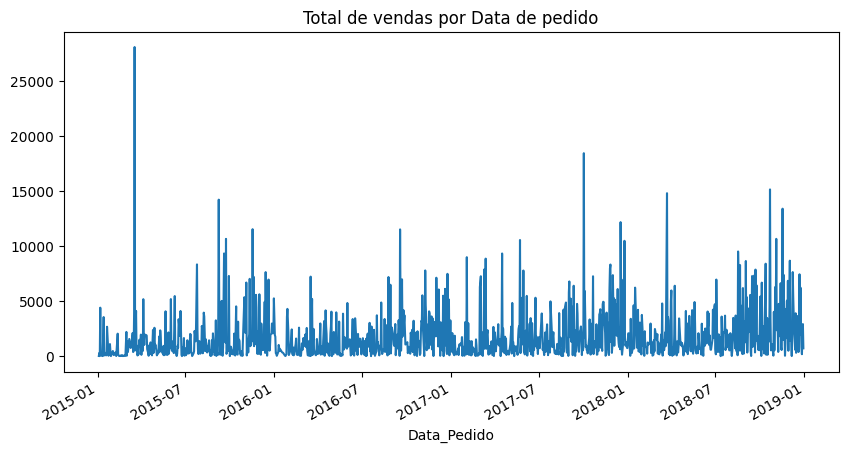

In [122]:
#agrupar a data_pedidos
df["Data_Pedido"] = pd.to_datetime(df["Data_Pedido"], format= '%d/%m/%Y')
b3 = df.groupby("Data_Pedido")["Valor_Venda"].sum().sort_index()
b3.head()
print(b3)
#plotar o gráfico
plt.figure(figsize = (10,5))
b3.plot(x="Data_pedido", y="Valor_Venda") 
plt.title("Total de vendas por Data de pedido")
plt.show()

•**Pergunta 3:**

    Qual o Total de Vendas por Estado?Demonstre o resultado através de um gráfico de barras.

        Estado  Valor_Venda
0      Alabama   19510.6400
1      Arizona   35272.6570
2     Arkansas   11673.8300
3   California  442927.0975
4     Colorado   31841.5980
5  Connecticut   13366.7370
6     Delaware   26452.5890


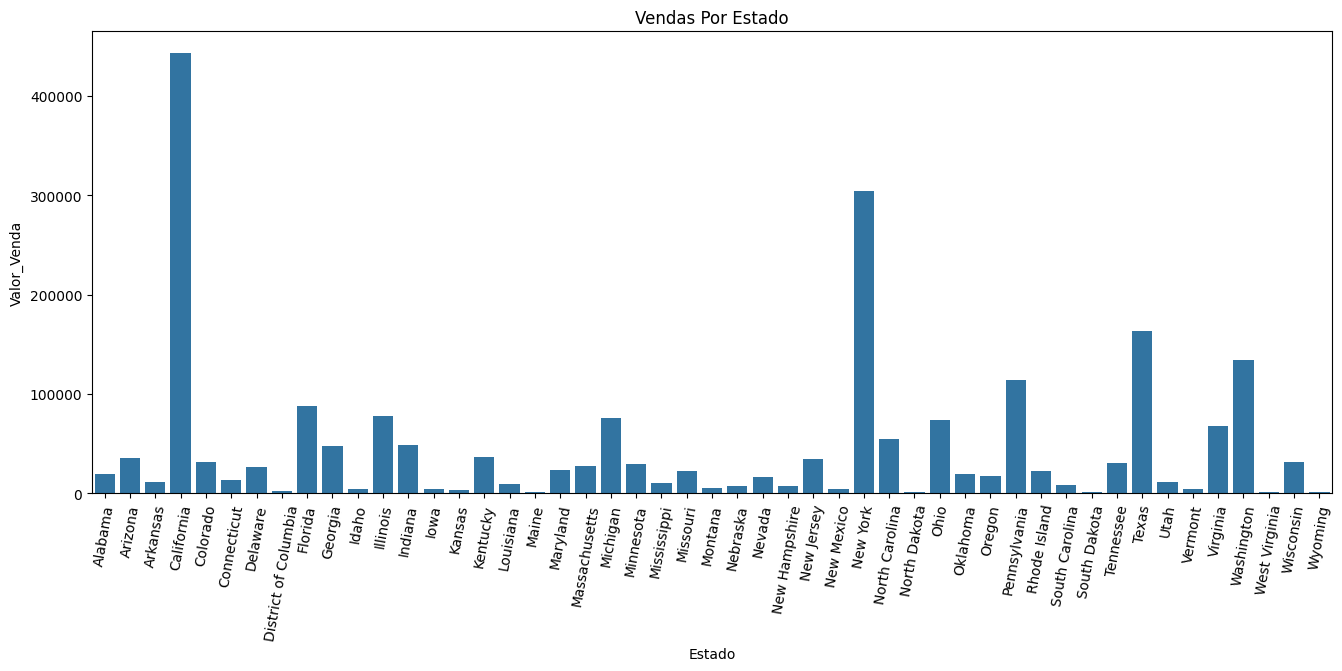

In [144]:
#agrupar por estado, somar os valores de venda e ordenar 
b4 = df.groupby("Estado")["Valor_Venda"].sum().reset_index()
print(b4.head(7))
#plotar o gráfico
plt.figure(figsize = (16, 6))
sns.barplot(data = b4, 
            y = "Valor_Venda", 
            x = "Estado").set(title = "Vendas Por Estado")
plt.xticks(rotation = 80)
plt.show()

•**Pergunta 4:**

    Quais São as 10 Cidades com Maior Total de Vendas?Demonstre o resultado através de um gráfico de barras.

            Cidade  Valor_Venda
327  New York City  251749.2190
265    Los Angeles  171654.6330
450        Seattle  114725.4780
436  San Francisco  107489.9520
372   Philadelphia  107197.8030
207        Houston   61590.1868
435      San Diego   47458.3790
80         Chicago   46974.3430
216   Jacksonville   44713.1830
123        Detroit   42446.9440


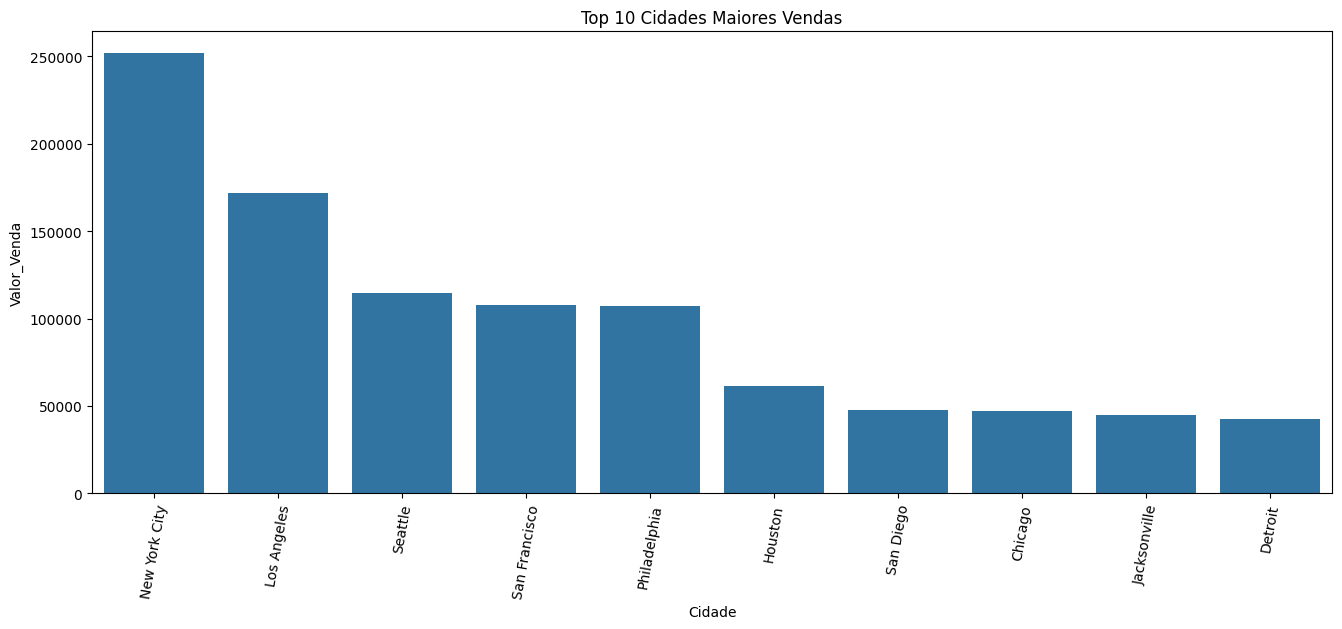

In [147]:
#agrupar por cidade, somar os valores de venda e ordenar os 10 maiores em ordem decrescente
b5 =df.groupby("Cidade")["Valor_Venda"].sum().reset_index().sort_values(by = "Valor_Venda", ascending = False).head(10)
print(b5)
#plotar o gráfico
plt.figure(figsize = (16, 6))
sns.barplot(data = b5, 
            y = "Valor_Venda", 
            x = "Cidade").set(title = "Top 10 Cidades Maiores Vendas")
plt.xticks(rotation = 80)
plt.show()

•**Pergunta 5:**

    Qual Segmento Teve o Maior Total de Vendas?Demonstre o resultado através de um gráfico de pizza.

      Segmento  Valor_Venda
0     Consumer      1133834
1    Corporate       679232
2  Home Office       422491


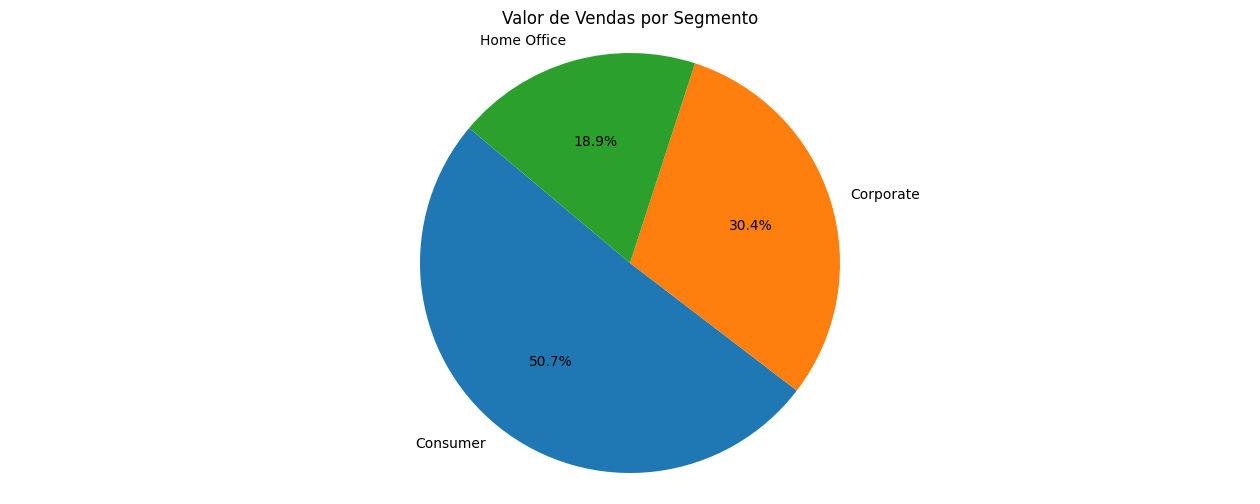

In [211]:
#agrupar por segmento e somar os valores de venda
b6 = df.groupby("Segmento")["Valor_Venda"].sum().reset_index()
b6["Valor_Venda"] = b6["Valor_Venda"].astype(int) #converter o resultado para valor absoluto
print(b6)

#plotar o gráfico
plt.figure(figsize=(16, 6))
plt.pie(b6["Valor_Venda"], labels=b6["Segmento"], autopct='%1.1f%%', startangle=140)
    #legendas e design
plt.title("Valor de Vendas por Segmento")
plt.axis('equal') 
plt.show()

•**Pergunta de Negócio 6**:

    Qual o Total de Vendas Por Segmento e Por Ano?

In [176]:
#formatar a coluna data_pedido
df["Data_Pedido"] = pd.to_datetime(df["Data_Pedido"], dayfirst = True)
#definir e formatar um novo nome de coluna para data_pedido
df["Ano"] = df["Data_Pedido"].dt.year
#agrupar por ano e segmento, e somar os valores de venda
b7 = df.groupby(["Ano", "Segmento"])["Valor_Venda"].sum()
print(b7)

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64


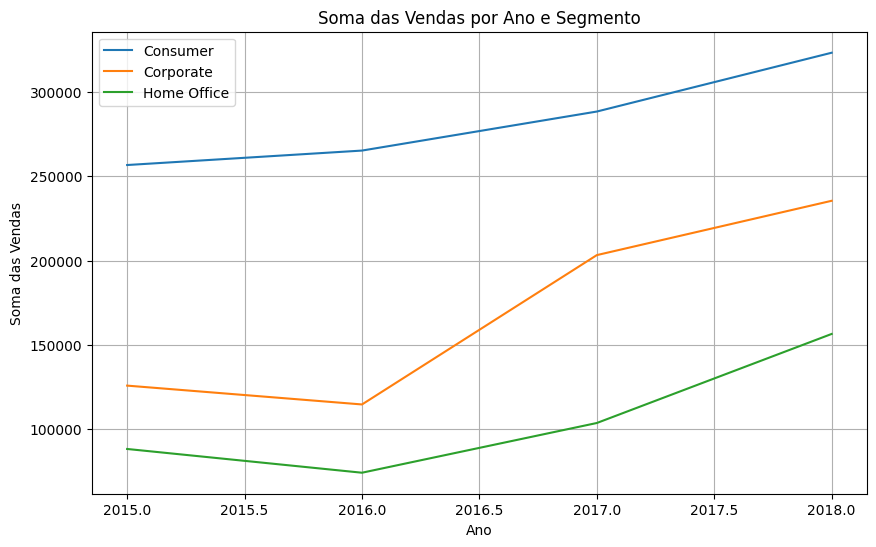

In [191]:
#Plotar o gráfico
plt.figure(figsize=(10, 6))
for segmento in b7["Segmento"].unique():
    dados_segmento = b7[b7["Segmento"] == segmento]
    plt.plot(dados_segmento["Ano"], dados_segmento["Valor_Venda"], label=segmento)

#legendas
plt.title("Soma das Vendas por Ano e Segmento")
plt.xlabel("Ano")
plt.ylabel("Soma das Vendas")
plt.legend()
plt.grid(True)
plt.show()


•**Pergunta de Negócio 7**:

    Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:Se o Valor_Venda for maior que 1000 recebe 15% de desconto.Se o Valor_Venda for menor que 1000 recebe 10% de desconto.Quantas Vendas Receberiam 15% de Desconto?


In [192]:
#criar uma nova coluna para armazernar os valores de venda de acordo com a condição
df["Desconto"] = np.where(df["Valor_Venda"] > 1000, 0.15, 0.10)  
df["Desconto"].value_counts()


Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

•**Pergunta de Negócio 8**:

    Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [251]:
#Antes do Desconto
vm_antes_d = (df.loc[df["Desconto"] == 0.15, "Valor_Venda"]).mean()
print(f"Média do Valor de Venda ANTES do desconto: \t${vm_antes_d:.2f}")

#Depois do Desconto
df['Desconto_15'] = df['Valor_Venda'] - (df['Valor_Venda'] * df['Desconto'])
vm_depois_d = (df.loc[df['Desconto'] == 0.15, 'Desconto_15']).mean()
print(f"Média do Valor de Venda APÓS o desconto de 15%: ${vm_depois_d:.2f}")


Média do Valor de Venda ANTES do desconto: 	$2116.81
Média do Valor de Venda APÓS o desconto de 15%: $1799.29


•**Pergunta de Negócio 9**:

    Qual a Média de Vendas Por Segmento, Por Ano e Por Mês?

In [252]:
#Por segmento
vm_seg = df.groupby("Segmento")["Valor_Venda"].sum().mean()
print(f"Média de vendas por Segmento: ${vm_seg:.2f}")

#Por ano
    #formatar a coluna data_pedido
df["Data_Pedido"] = pd.to_datetime(df["Data_Pedido"], dayfirst = True)
    #definir e formatar data_pedido para ano
df["Ano"] = df["Data_Pedido"].dt.year

vm_ano = df.groupby(["Ano"])["Valor_Venda"].sum().mean()
print(f"Média de vendas por Ano: ${vm_ano:.2f}")

#Por mês
    #definir e formatar data_pedido para mês
df["Mes"] = df["Data_Pedido"].dt.month

vm_mes = df.groupby(["Mes"])["Valor_Venda"].sum().mean()
print(f"Média de vendas por Mês: ${vm_mes:.2f}")

Média de vendas por Segmento: $745185.98
Média de vendas por Ano: $558889.49
Média de vendas por Mês: $186296.50


•**Pergunta de Negócio 10**:

    Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?Demonstre tudo através de um único gráfico.

In [226]:
# Agrupamos por categoria e subcategoria e calculamos a soma somente para variáveus numéricas
b10 = df.groupby(["Categoria","SubCategoria"]).sum(numeric_only = True).sort_values("Valor_Venda", ascending = False).head(12)

# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
b10 = b10[["Valor_Venda"]].astype(int).sort_values(by = "Categoria").reset_index()
b10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [227]:
# Criamos outro dataframe somente com os totais por categoria
b11 = b10.groupby('Categoria').sum(numeric_only = True).reset_index()
b11

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [228]:
# Lista de cores 
    #para categorias
cores_categorias = ['#5d00de','#0ee84f','#e80e27']
    #para subcategorias
cores_subcategorias = ['#aa8cd4','#aa8cd5','#aa8cd6','#aa8cd7','#26c957','#26c958','#26c959','#26c960','#e65e65','#e65e66','#e65e67','#e65e68']


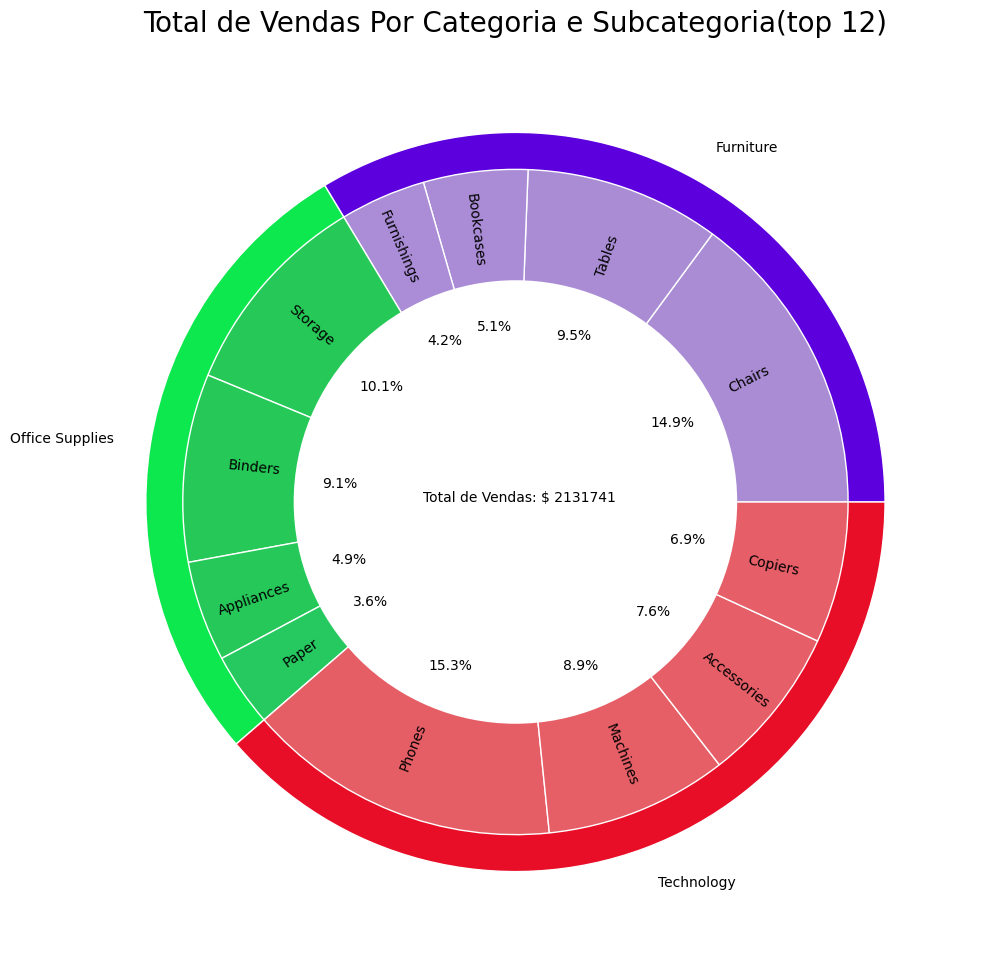

In [246]:
# Plotar gráfico
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(b11['Valor_Venda'], 
            radius = 1,
            labels = b11['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)
            

# Gráfico das subcategorias
p2 = ax.pie(b10['Valor_Venda'],
            radius = 0.9,
            labels = b10['SubCategoria'],
            autopct = lambda pct: f'{pct:.1f}%',
            colors = cores_subcategorias, 
            labeldistance = 0.71,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(b10['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Categoria e Subcategoria(top 12)', fontsize=20)
plt.show()

## Fim